In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix


In [2]:
parquet_file = 'ciciot2022.parquet'
df = pd.read_parquet(parquet_file)

In [3]:
# Convert DataFrame to CSV
csv_file = 'ciciot2022.csv'
df.to_csv(csv_file, index=False)
df = pd.read_csv(csv_file)
df


,L4_tcp,L4_udp,L7_http,L7_https,port_class_src,port_class_dst,pck_size,ip_dst_new,ethernet_frame_size,ttl,...,q3_e,q1_e,iqr_e,epoch_timestamp,inter_arrival_time,time_since_previously_displayed_frame,global_category,device,interaction_type,command
0,True,False,False,False,2,3,442,3232270593,476,64,...,442.00,442.00,0.00,1634049773,0.000000,0.000000,AUDIO,nestmini,LAN,VOLUMEON
1,True,False,False,False,3,2,20,3232270754,54,128,...,336.50,125.50,211.00,1634049773,0.048638,0.048638,AUDIO,nestmini,LAN,VOLUMEON
2,False,False,False,False,0,0,64,3232270593,98,64,...,253.00,42.00,211.00,1634049773,0.386110,0.434748,AUDIO,nestmini,LAN,VOLUMEON
3,True,False,False,False,2,3,300,3232270593,334,64,...,335.50,53.00,282.50,1634049774,0.458671,0.893419,AUDIO,nestmini,LAN,VOLUMEON
4,True,False,False,False,3,2,20,3232270754,54,128,...,300.00,20.00,280.00,1634049774,0.051143,0.944562,AUDIO,nestmini,LAN,VOLUMEON
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229501,True,False,False,False,2,2,89,3232270836,123,223,...,157.25,89.00,68.25,1633459940,0.088585,0.088585,HOME AUTOMATION,heimvisionlamp,LOCAL,LIGHTOFF
229502,True,False,False,False,2,2,20,597822746,54,255,...,134.50,54.50,80.00,1633459940,0.076676,0.165261,HOME AUTOMATION,heimvisionlamp,LOCAL,LIGHTOFF
229503,False,True,False,False,3,2,180,4294967295,214,255,...,180.00,71.75,108.25,1633459940,0.545729,0.710990,HOME AUTOMATION,heimvisionlamp,LOCAL,LIGHTOFF
229504,False,True,False,False,3,2,180,4294967295,214,255,...,180.00,89.00,91.00,1633459945,5.005840,5.716830,HOME AUTOMATION,heimvisionlamp,LOCAL,LIGHTOFF


In [4]:
# Display the first few rows of the dataset to understand its structure
df.head()

,L4_tcp,L4_udp,L7_http,L7_https,port_class_src,port_class_dst,pck_size,ip_dst_new,ethernet_frame_size,ttl,...,q3_e,q1_e,iqr_e,epoch_timestamp,inter_arrival_time,time_since_previously_displayed_frame,global_category,device,interaction_type,command
0,True,False,False,False,2,3,442,3232270593,476,64,...,442.0,442.0,0.0,1634049773,0.000000,0.000000,AUDIO,nestmini,LAN,VOLUMEON
1,True,False,False,False,3,2,20,3232270754,54,128,...,336.5,125.5,211.0,1634049773,0.048638,0.048638,AUDIO,nestmini,LAN,VOLUMEON
2,False,False,False,False,0,0,64,3232270593,98,64,...,253.0,42.0,211.0,1634049773,0.386110,0.434748,AUDIO,nestmini,LAN,VOLUMEON
3,True,False,False,False,2,3,300,3232270593,334,64,...,335.5,53.0,282.5,1634049774,0.458671,0.893419,AUDIO,nestmini,LAN,VOLUMEON
4,True,False,False,False,3,2,20,3232270754,54,128,...,300.0,20.0,280.0,1634049774,0.051143,0.944562,AUDIO,nestmini,LAN,VOLUMEON


In [5]:
# Handle missing values if any
df.dropna(inplace=True)

In [6]:
df.shape

(229506, 52)

In [7]:
df.global_category.value_counts()

global_category
CAMERA             191175
HOME AUTOMATION     19557
AUDIO               18774
Name: count, dtype: int64

In [8]:
# Let's balance it out more or less, optional
df = df.drop(index=df.loc[df.global_category == 'CAMERA'].sample(171000).index)
df.global_category.value_counts()

global_category
CAMERA             20175
HOME AUTOMATION    19557
AUDIO              18774
Name: count, dtype: int64

In [9]:
df.columns

Index(['L4_tcp', 'L4_udp', 'L7_http', 'L7_https', 'port_class_src',
       'port_class_dst', 'pck_size', 'ip_dst_new', 'ethernet_frame_size',
       'ttl', 'total_length', 'protocol', 'source_port', 'dest_port',
       'DNS_count', 'NTP_count', 'ARP_count', 'cnt', 'L3_ip_dst_count',
       'most_freq_d_ip', 'most_freq_prot', 'most_freq_sport',
       'most_freq_dport', 'sum_et', 'min_et', 'max_et', 'med_et', 'average_et',
       'skew_et', 'kurt_et', 'var', 'q3', 'q1', 'iqr', 'sum_e', 'min_e',
       'max_e', 'med', 'average', 'skew_e', 'kurt_e', 'var_e', 'q3_e', 'q1_e',
       'iqr_e', 'epoch_timestamp', 'inter_arrival_time',
       'time_since_previously_displayed_frame', 'global_category', 'device',
       'interaction_type', 'command'],
      dtype='object')

In [10]:
audio = df.loc[df.global_category == 'AUDIO'].index
camera = df.loc[df.global_category == 'CAMERA'].index
automation = df.loc[df.global_category == 'HOME AUTOMATION'].index

In [11]:
df = df.drop(columns=['device', 'interaction_type', 'command'])

In [12]:
cats = df.select_dtypes('category').columns
print(len(cats), cats)
conts = df.columns.difference(cats)
print(len(conts), conts)
target = 'global_category'
print(df.shape)

0 Index([], dtype='object')
49 Index(['L4_tcp', 'L4_udp', 'L7_http', 'L7_https', 'port_class_src',
       'port_class_dst', 'pck_size', 'ip_dst_new', 'ethernet_frame_size',
       'ttl', 'total_length', 'protocol', 'source_port', 'dest_port',
       'DNS_count', 'NTP_count', 'ARP_count', 'cnt', 'L3_ip_dst_count',
       'most_freq_d_ip', 'most_freq_prot', 'most_freq_sport',
       'most_freq_dport', 'sum_et', 'min_et', 'max_et', 'med_et', 'average_et',
       'skew_et', 'kurt_et', 'var', 'q3', 'q1', 'iqr', 'sum_e', 'min_e',
       'max_e', 'med', 'average', 'skew_e', 'kurt_e', 'var_e', 'q3_e', 'q1_e',
       'iqr_e', 'epoch_timestamp', 'inter_arrival_time',
       'time_since_previously_displayed_frame', 'global_category'],
      dtype='object')
(58506, 49)


In [13]:
def xs_y(df_, targ): 
    if not isinstance(targ, list):
        xs = df_[df_.columns.difference([targ])].copy()
    else:
        xs = df_[df_.columns.difference(targ)].copy()
    y = df_[targ].copy()
    return xs, y

In [14]:
training_set = df.sample(frac=0.2, replace=False, random_state=42)
testing_set = df.drop(index=training_set.index)
training_set.shape, testing_set.shape

((11701, 49), (46805, 49))

In [15]:
X_train, y_train = xs_y(training_set, targ=target)
X_test, y_test = xs_y(testing_set, targ=target)

In [16]:
# Step 5: Feature Scaling 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [17]:
# step 6: Train the SVM Model 

svm_model = SVC(kernel='rbf', C=1.0, gamma='scale') # You can adjust hyperparameters
svm_model.fit(X_train_scaled, y_train)

SVC()

In [18]:
# step 7 : Model Evaluation
y_pred = svm_model.predict(X_test_scaled)


In [19]:
# step 8: Evaluate The Model  
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 0.974746287789766

Classification Report:
                 precision    recall  f1-score   support

          AUDIO       0.95      0.99      0.97     15037
         CAMERA       0.99      0.96      0.97     16160
HOME AUTOMATION       0.99      0.97      0.98     15608

       accuracy                           0.97     46805
      macro avg       0.97      0.98      0.97     46805
   weighted avg       0.98      0.97      0.97     46805

Confusion Matrix:
[[14882    74    81]
 [  495 15570    95]
 [  275   162 15171]]


# Grid Search

In [20]:
# Step 1: Import Necessary Libraries
from sklearn.model_selection import GridSearchCV


In [21]:
# Step 2: Define Parameter Grid
# Define the parameter grid
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001], 'kernel': ['rbf']}


In [22]:
# Step 4: Initialize Grid Search
grid = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)


In [23]:
# Step 5: Fit Grid Search to Data
grid.fit(X_train_scaled, y_train)


Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   8.7s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.500 total time=   8.4s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.524 total time=   8.3s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.4s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.510 total time=   8.4s
[CV 1/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.909 total time=   4.7s
[CV 2/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.918 total time=   4.5s
[CV 3/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.916 total time=   4.5s
[CV 4/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.900 total time=   4.4s
[CV 5/5] END ......C=0.1, gamma=0.1, kernel=rbf;, score=0.922 total time=   4.5s
[CV 1/5] END .....C=0.1, gamma=0.01, kernel=rbf;, score=0.902 total time=   3.5s
[CV 2/5] END .....C=0.1, gamma=0.01, kernel=rbf;

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['rbf']},
             verbose=3)

In [24]:
# step 6: Get Best Parameters 
print("Best parameters found: ", grid.best_params_)


Best parameters found:  {'C': 100, 'gamma': 0.01, 'kernel': 'rbf'}


In [25]:
# Step 7: Evaluate the Model
y_pred1 = grid.predict(X_test_scaled)
accuracy_grid = accuracy_score(y_test, y_pred1)


In [26]:
# step 9 : Evaluate The Model 
# Calculate accuracy
print("Accuracy:", accuracy_grid)
print("Classification Report:")
print(classification_report(y_test, y_pred1))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred1))


Accuracy: 0.9869244738809956
Classification Report:
                 precision    recall  f1-score   support

          AUDIO       0.98      0.99      0.98     15037
         CAMERA       0.99      0.98      0.99     16160
HOME AUTOMATION       0.99      0.99      0.99     15608

       accuracy                           0.99     46805
      macro avg       0.99      0.99      0.99     46805
   weighted avg       0.99      0.99      0.99     46805

Confusion Matrix:
[[14915    77    45]
 [  274 15818    68]
 [   86    62 15460]]


# Random Search  

In [27]:
# Step 1: Import Necessary Libraries
from sklearn.model_selection import RandomizedSearchCV


In [28]:
# Step 2: Define Parameter Distributions
from scipy.stats import uniform, randint
# Define the parameter distributions
param_dist = {'C': uniform(0.1, 10), 'gamma': uniform(0.01, 1), 'kernel': ['rbf']}


In [29]:
# Step 4: Initialize Randomized Search
random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=10, random_state=42, cv=5)


In [30]:
# Step 5: Fit Randomized Search to Data
random_search.fit(X_train_scaled, y_train)


RandomizedSearchCV(cv=5, estimator=SVC(),
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019E23434F90>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x0000019E2333EF90>,
                                        'kernel': ['rbf']},
                   random_state=42)

In [31]:
# Step 6: Get Best Parameters
print("Best parameters found: ", random_search.best_params_)


Best parameters found:  {'C': 1.6601864044243653, 'gamma': 0.16599452033620266, 'kernel': 'rbf'}


In [32]:
y_pred2 = random_search.predict(X_test_scaled)
accuracy_random = accuracy_score(y_test, y_pred2)


In [33]:
# Step 9: Evaluate the Model
print("Accuracy:", accuracy_random)
print("Classification Report:")
print(classification_report(y_test, y_pred2))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred2))


Accuracy: 0.9704732400384575
Classification Report:
                 precision    recall  f1-score   support

          AUDIO       0.97      0.97      0.97     15037
         CAMERA       0.95      0.98      0.96     16160
HOME AUTOMATION       0.99      0.96      0.98     15608

       accuracy                           0.97     46805
      macro avg       0.97      0.97      0.97     46805
   weighted avg       0.97      0.97      0.97     46805

Confusion Matrix:
[[14633   363    41]
 [  341 15761    58]
 [   89   490 15029]]


# Comparison (Grid Search and Random Search)

In [34]:
import matplotlib.pyplot as plt

In [36]:
# Accuracy scores
accuracy_scores = [accuracy_grid, accuracy_random]
search_methods = ['Grid Search', 'Randomized Search']

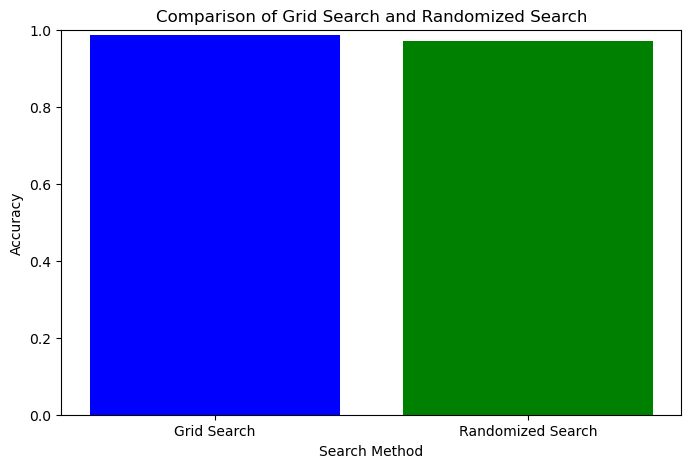

In [37]:
# Plotting
plt.figure(figsize=(8, 5))
plt.bar(search_methods, accuracy_scores, color=['blue', 'green'])
plt.xlabel('Search Method')
plt.ylabel('Accuracy')
plt.title('Comparison of Grid Search and Randomized Search')
plt.ylim(0, 1)  # Set y-axis limits
plt.show()